In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from HOTS.STS import STS
from HOTS.Event import Event, Filters
from HOTS.Monitor import DisplaySurface3D, DisplaySurface2D

%matplotlib inline

## Filtering isolated events

In [3]:
Events = Event(); F = Filters(Events)
address,time,polarity,event = Events.LoadFromMat('../Data/ExtractedStabilized.mat',image_number=35)
address_1,time_1,polarity_1,event_1 = F.Neighbour(threshold=15, neighbourhood=2,image_size=(32,32))

chargement des images [35]


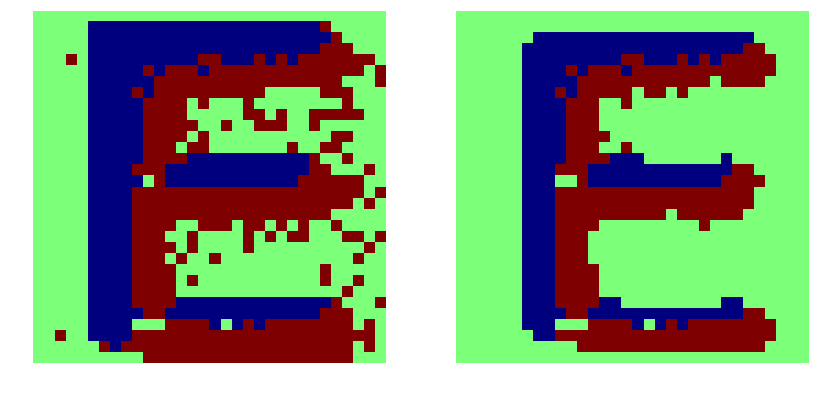

In [4]:
# Graphing the difference between filtered and non filtered data
image_non_filtered = np.zeros((32, 32))
image_filtered = np.zeros((32, 32))

fig = plt.figure(figsize=(2 * 5, 1 * 5))
ax0 = fig.add_subplot(1, 2, 1)
image_non_filtered[address[:, 0].T, address[:, 1].T] = polarity[:].T
ax0.axis('off')

plt.imshow(image_non_filtered,interpolation='nearest')
ax1=fig.add_subplot(1, 2, 2)
image_filtered[address_1[:, 0].T, address_1[:, 1].T] = polarity_1[:].T
ax1.axis('off')
plt.imshow(image_filtered,interpolation='nearest');

## Plotting the time Matrix

In [5]:
target_event = 3000

In [6]:
SpTe= STS(tau=0.02, R=2, ListPolarities=[-1,1],ImageSize=(32,32),verbose=1,initial_time=0)
Surface = SpTe.create(event = Events, stop = target_event)

Generation of SpatioTemporal Surface in ------ 0.05 s


In [7]:
w = SpTe.R + 1
x,y = address_1[target_event, 0],address_1[target_event, 1]
(x0, y0) = (x + SpTe.R - w, y + SpTe.R - w)
(x1, y1) = (x + SpTe.R + w, y + SpTe.R + w)

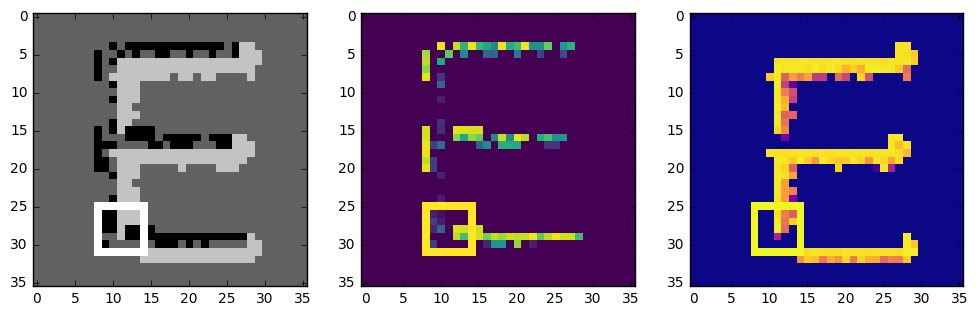

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
image = np.zeros((SpTe.width, SpTe.height))
image[address_1[0:target_event+1, 0].T + SpTe.R, 
      address_1[0:target_event+1, 1].T + SpTe.R] = polarity_1[0:target_event+1].T
image1 = image.copy()
cv2.rectangle(image1, (y0, x0), (y1, x1),
              color=np.amax(image)+0.6)
#axs[0].axis('off')
axs[0].imshow(image1,cmap = plt.gray(),interpolation='nearest')

ImageTimeMat1 = SpTe.ListOfTimeMatrix[0, :, :]
cv2.rectangle(ImageTimeMat1, (y0, x0), (y1, x1),
              color=np.amax(ImageTimeMat1) + 0.001)
#axs[1].axis('off')
axs[1].imshow(ImageTimeMat1, cmap=plt.viridis(),interpolation='nearest')

ImageTimeMat2 = SpTe.ListOfTimeMatrix[1, :, :]
cv2.rectangle(ImageTimeMat2, (y0, x0), (y1, x1),
              color=np.amax(ImageTimeMat2) + 0.001)
#axs[2].axis('off')
axs[2].imshow(ImageTimeMat2, cmap=plt.plasma(),interpolation='nearest');

## Plotting the local time Matrix

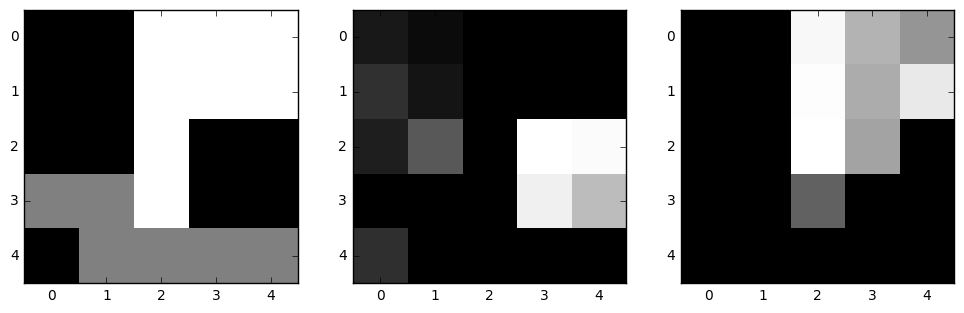

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(3 * 4, 1 * 4))
x_t, y_t = x + SpTe.R, y + SpTe.R

image_local = image[(x_t-SpTe.R):(x_t+SpTe.R+1), (y_t-SpTe.R):(y_t+SpTe.R+1)]
axs[0].imshow(image_local, cmap=plt.gray(), interpolation = "nearest")
axs[1].imshow(SpTe.LocalTimeMatrix[0, :, :], cmap=plt.gray(),interpolation = "nearest")
axs[2].imshow(SpTe.LocalTimeMatrix[1, :, :], cmap=plt.gray(), interpolation = "nearest");

## Plotting the Spatio Temporal Surfaces

(1, 2)


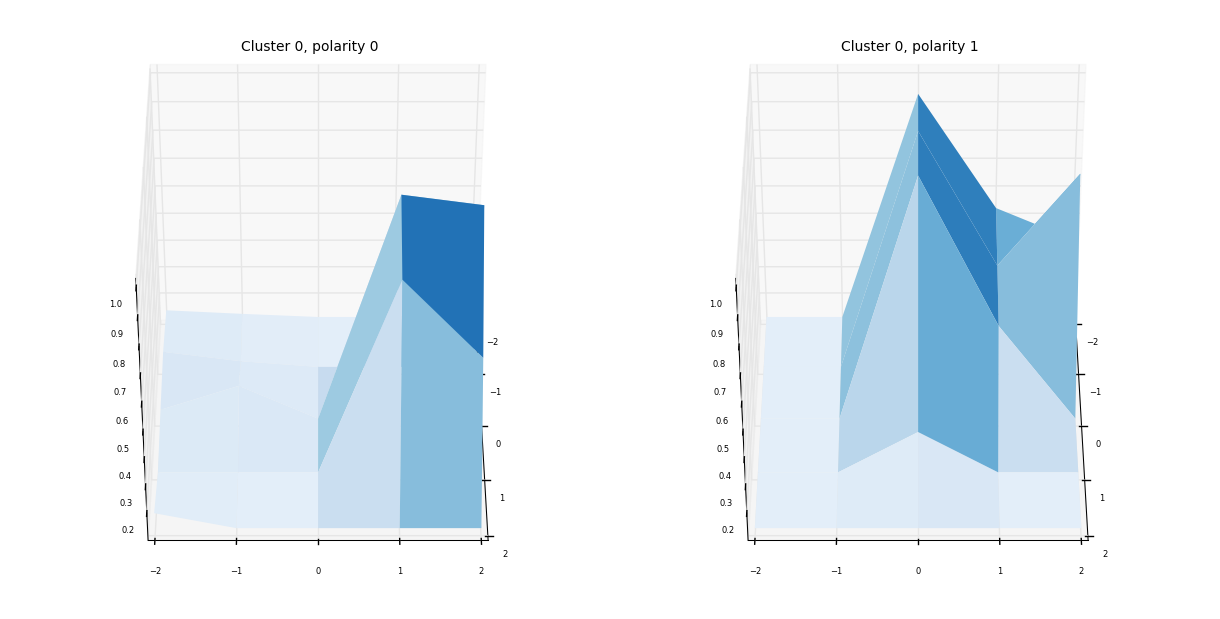

In [10]:
Surface_to_plot = Surface[-1,:,:][np.newaxis,:,:]
DisplaySurface3D(Surface_to_plot,nb_polarities=2,angle=(40,0))

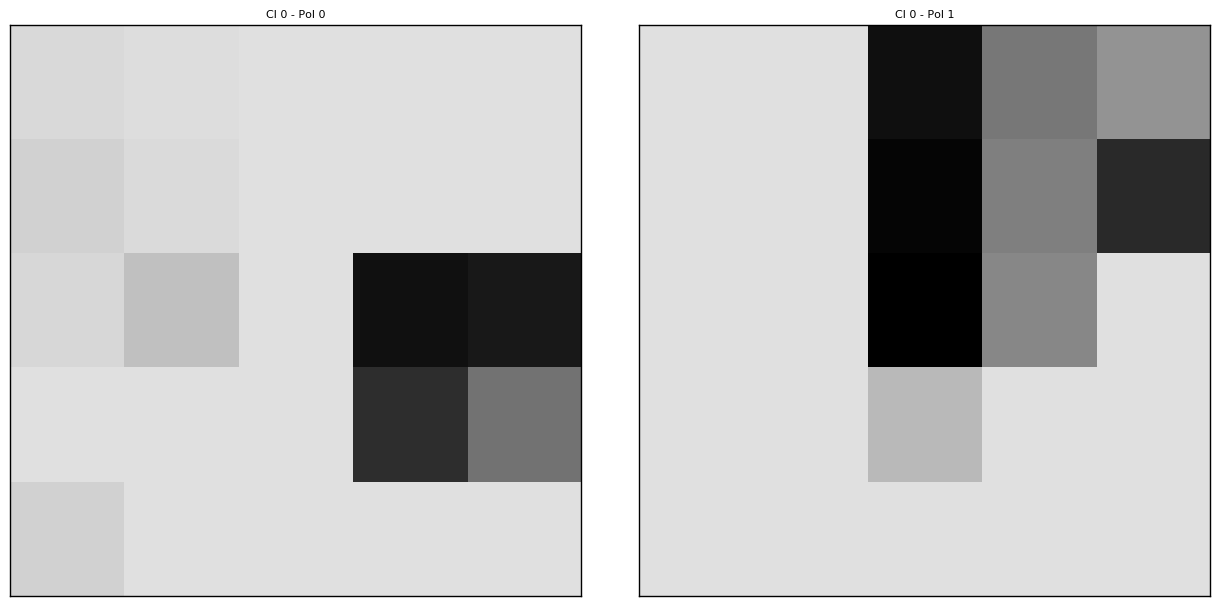

In [11]:
DisplaySurface2D(Surface_to_plot,nb_polarities=2)